# 深層学習da3
## Section1 : 再帰型ニューラルネットワークの概念

- 再帰型ニューラルネットワーク（RNN）  
自然言語処理によく使われる方法。  
特徴として、時系列データに対応することができるニューラルネットワーク。  
具体的には、「音声データ」「株価データ」「テキストデータ（言語）」「博物館の入場者数」など。  
- RNNの基本的構造  
入力層-中間層-出力層という基本構造は、通常のニューラルネットワークと同じ。  
RNNでは中間層からの出力を、「入力層から来たかのように」もう一度中間層に入れる。  
- RNNでのパラメータ  
RNNで考える重みパラメータは大きく3種類。入力データに係る$W_{(in)}$、中間層から中間層に係る$W$、出力層でかかる$W_{(out)}$  
- RNNの数式での記述  
$$
u^t = W_{(in)}x^t + W z^{t-1} +b \\
z^t = f(W_{(in)}x^t + Wz^{t-1} + b) \\
v^t = W_{(out)}z^t + c \\
y^t = g(W_{(out)}z^t + c)
$$

以下、Pythonコードでの実装を確認する(バイナリ加算)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def d_tanh(x):
    return 1/ (np.cosh(x) ** 2)

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

def d_sigmoid(x):
    dx = (1.0 - sigmoid(x)) * sigmoid(x)
    return dx

def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx

In [ ]:
binary_dim = 8
largest_number = pow(2, binary_dim)
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T, axis = 1)

In [ ]:
binary.shape

(256, 8)

In [ ]:
# 初期値の設定
input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

iters:0
Loss :1.2728704522174796
Pred :[1 1 1 1 1 1 1 1]
True :[1 0 0 1 0 1 1 0]
40 + 110 = 255
----------
iters:100
Loss :1.1833347644106869
Pred :[0 0 0 0 0 0 1 1]
True :[1 0 1 1 1 0 0 0]
76 + 108 = 3
----------
iters:200
Loss :1.1061369248791877
Pred :[0 1 1 1 1 1 1 1]
True :[1 0 1 1 0 1 0 1]
123 + 58 = 127
----------
iters:300
Loss :1.0878728364660748
Pred :[0 0 0 0 0 0 1 0]
True :[1 0 0 1 0 1 1 1]
98 + 53 = 2
----------
iters:400
Loss :1.0832243832242292
Pred :[0 0 0 0 0 0 0 0]
True :[0 1 0 1 1 1 1 0]
46 + 48 = 0
----------
iters:500
Loss :0.894343608737821
Pred :[1 0 1 0 0 0 0 0]
True :[1 0 1 0 1 0 0 1]
81 + 88 = 160
----------
iters:600
Loss :1.0169045553554095
Pred :[1 0 1 0 1 1 1 0]
True :[1 0 0 0 1 1 1 1]
87 + 56 = 174
----------
iters:700
Loss :0.9919654814116694
Pred :[1 1 1 1 0 0 0 1]
True :[1 0 1 1 0 0 0 0]
120 + 56 = 241
----------
iters:800
Loss :0.9987158181232302
Pred :[1 0 0 0 0 0 0 0]
True :[0 1 1 1 0 0 0 1]
4 + 109 = 128
----------
iters:900
Loss :0.884006203664590

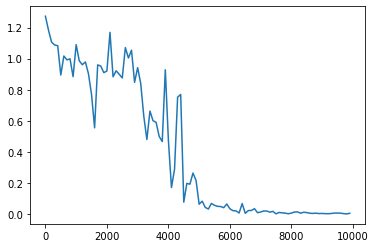

In [ ]:
for i in range(iters_num):
    a_int = np.random.randint(largest_number / 2)
    a_bin = binary[a_int]
    b_int = np.random.randint(largest_number / 2)
    b_bin = binary[b_int]
    
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    out_bin = np.zeros_like(d_bin)
    
    all_loss = 0
    
    # 順伝播 tをずらしながら（時系列として）学習を進める。
    for t in range(binary_dim):
        X = np.array([a_bin[-t-1], b_bin[-t-1]]).reshape(1,-1)
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:, t].reshape(1, -1), W)
        z[:,t+1] = sigmoid(u[:,t+1])
        y[:,t] = sigmoid(np.dot(z[:,t+1].reshape(1,-1), W_out))
        
        loss = mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = d_mean_squared_error(dd, y[:,t]) * d_sigmoid(y[:,t])
        
        all_loss += loss
        
        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    # 逆伝播
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)
        
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + 
                      np.dot(delta_out[:,t].T, W_out.T)) * d_sigmoid(u[:,t+1])
        
        # 勾配の更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
        
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad

    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0

    if(i % plot_interval == 0):
        all_losses.append(all_loss)
        print("iters:" + str(i))
        print("Loss :" + str(all_loss))
        print("Pred :" + str(out_bin))
        print("True :" + str(d_bin))
        out_int = 0
        for index, x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("----------")
            
lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label = "loss")
plt.show()

- 逆伝播の復習
ニューラルネットワークの出力層の側から、微分値を掛け合わせながら進んでいくことで、各層でのパラメータによる微分を求めることができる。(これをパラメータ更新に利用する)
- RNNにおける逆伝播とは？→BPTT  
RNNの更新するパラメータは3つある$W_{(in)},W_{(out)},W$。それぞれについて、通常と同様に微分の連鎖率を用いて計算できる。
$$
    \frac{\partial E}{\partial W_{(in)}} = \frac{\partial E}{\partial u^t}\left[\frac{\partial u^t}{\partial W_{(in)}}\right]^T = \delta ^t[x^t]^T\\
    \frac{\partial E}{\partial W_{(out)}} = \frac{\partial E}{\partial v^t}\left[\frac{\partial v^t}{\partial W_{(out)}}\right]^T = \delta ^{out,t}[z^t]^T\\
    \frac{\partial E}{\partial W} = \frac{\partial E}{\partial u^t}\left[\frac{\partial u^t}{\partial W}\right]^T = \delta ^t[z^{t-1}]^T\\
    \frac{\partial E}{\partial b} = \frac{\partial E}{\partial u^t}\frac{\partial u^t}{\partial b} = \delta ^t \\
    \frac{\partial E}{\partial c} = \frac{\partial E}{\partial v^t}\frac{\partial v^t}{\partial c} = \delta ^{out,t}
$$

In [ ]:
# 演習チャレンジのコード実装
def traverse(node):
    """
    構文木を入力として文全体の表現ベクトルを得るプログラム
    """
    if not isinstance(node, dict):
        v = node
    else:
        # 再帰的に左右の子ノードを処理
        left = traverse(node["left"])
        right = traverse(node["right"])
        
        # 活性化関数をかませて表現ベクトルを得る。 
        # Wはグローバルに定義されている。
        v = _activation(W.dot(np.concatenate([left, right])))

In [ ]:
# 演習チャレンジのコード実装例
def bptt(xs, ys, W, U, V):
    """
    BPTTによる逆伝播の計算
    """
    hiddens, outputs = rnn_net(xs, W, U, V) # 多分、レイヤーを返す関数
    
    # 初期化
    dW = np.zeros_like(W)
    dU = np.zeros_like(U)
    dV = np.zeros_like(V)
    
    do = _calculate_do(outputs, ys)
    
    batch_size, n_seq = ys.shape[:2]
    
    #ここからバックプロパゲーションの計算
    for t in reversed(range(n_seq)):
        dV += np.dot(do[:, t].T, hiddens[:, t]) / batch_size
        delta_t = do[:, t].dot(V)
        for bptt_step in reversed(range(t+1)):
            dW += np.dot(delta_t.T, xs[:, bptt_step]) / batch_size
            dU += np.dot(delta_t.T, hiddens[:, bptt_step - 1]) / batch_size
            delta_t = delta_t.dot(U)
    return dW, dU, dV

## Section2 : LSTM

- RNNの課題（勾配消失）  
時間的なつながりが増えると、通常のNNで層の数が増えたときと同様に勾配消失が起こる（微小量を多数掛け合わせることになる）  
例えば勾配消失しやすい活性化関数として、sigmoid関数がある

In [ ]:
# 参考：シグモイド関数の微分の最大値
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

d_sigmoid(0)

0.25

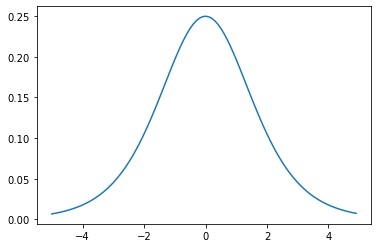

In [ ]:
# x=0で最大になることを図的に確認
import matplotlib.pyplot as plt

xs = np.arange(-5,5,0.1)
ys = d_sigmoid(xs)
plt.plot(xs,ys)

In [ ]:
# 演習チャレンジのコード例  
def gradient_clipping(grad, threshold):
    """
    勾配爆発を防ぐために、勾配のノルムに閾値を設ける
    """
    norm = np.linalg.norm(grad)
    rate = threshold / norm
    if rate < 1:
        return grad * rate
    return grad

- LSTMとは  
RNNの一種。中間層としてCECという層を持つ。  
CECは過去の時間情報を「記憶する」ものとして取り入れる。
勾配消失の原因は、勾配が1より小さいことに起因するので、勾配が1であればよい。  
しかし、CECは「記憶」する機能しか持たないため、学習する機能を持たない。  
そこで、入力ゲートと出力ゲートを組み合わせて使う。  
- 入力ゲート  
入力ゲートは、CECへの入力を加工し、どういった情報を「記憶」すればよいのかを調整する。  
入力ゲートは、学習することができる。  
パラメータとして、$W_i,U_i$を持つ。今回の入力および前回の出力をどのくらい使うかを支配するパラメータ。
- 出力ゲート  
CECからの出力を、どのように加工すれば、「記憶」をうまく使えるのかを調整する。  
出力ゲートは、学習することができる。  
- 忘却ゲート  
CECは情報の損失なく、過去の時間情報を「記憶」しているので、古すぎる情報を使ってしまうことがある。  
その対策として、忘却ゲートを用いて、ある程度古い情報は捨てるように調整する。  
- 覗き穴結合  
現在のCECの状況も入出力、忘却ゲートの計算に利用するというもの。  
ただし、実際にはあまり効果はでなかった。

In [ ]:
def lstm(x, prev_h, prev_c, W, U, b):
    """
    LSTMにおける順伝播の計算
    """
    # _activationは活性化関数を別に定義する。
    lstm_in = _activation(x.dot(W.T) + prev_h.dot(U.T) + b)
    a, i, f, o = np.hsplit(lstm_in, 4)
    
    a = np.tanh(a)
    input_gate = _sigmoid(i)
    forget_gate = _sigmoid(f)
    output_gate = _sigmoid(o)
    
    # 状態の更新
    c = input_gate * a + forget_gate * c
    h = output_gate * np.tanh(c)
    return c, h

In [ ]:
# predict wordを以下に実装する。
import tensorflow as tf
import numpy as np
import re
import glob
import collections
import random
import pickle
import time
import datetime
import os

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
class Corpus:
    def __init__(self):
        self.unknown_word_symbol = "<???>"
        self.unknown_word_threshold = 3
        self.corpus_file = "./drive/MyDrive/Colab Notebooks/corpus/**/*.txt"
        self.corpus_encoding = "utf-8"
        self.dictionary_filename = "./drive/MyDrive/Colab Notebooks/data_for_predict/word_dict.dic"
        self.chunk_size = 5
        self.load_dict()
        
        words = []
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:
                text = f.read()
                text = text.lower().replace("\n", " ")
                text = re.sub(r"[^a-z '\-]", "", text)
                text = re.sub(r"[ ]+", " ", text)
                
                words = [ word for word in text.split() if not word.startswith("-")]
                
        self.data_n = len(words) - self.chunk_size
        self.data = self.seq_to_matrix(words)
        
    def load_dict(self):
        """
        保存された辞書データを読み込む。
        """
        with open(self.dictionary_filename, "rb") as f:
            self.dictionary = pickle.load(f)
            self.vocabulary_size = len(self.dictionary)
            self.input_layer_size = len(self.dictionary)
            self.output_layer_size = len(self.dictionary)
            print("総単語数: ", self.input_layer_size)
            
    def seq_to_matrix(self, seq):
        """
        1つの文章をon-hotの形に変換する(vocabulary_size, data_n)
        """
        print(seq)
        data = np.array([self.to_one_hot(word) for word in seq])
        return data.transpose()
    
    def to_one_hot(self, word):
        """
        1単語をvocabularyを参照して一つのベクトル表現に直す。
        """
        index = self.get_word_id(word)
        # 対応するインデックスの場所のみ、1で、あとは0のベクトル
        data = np.zeros(self.vocabulary_size)
        data[index] = 1
        return data
    
    def get_word_id(self, word):
        """dictionary の機能を使って対応するidを返す"""
        return self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])
        
    def prepare_data(self):
        """
        訓練データとテストデータを準備する
        """
        # 入力と出力の次元テンソルを準備
        all_input = np.zeros([self.chunk_size, self.vocabulary_size, self.data_n])
        all_output = np.zeros([self.vocabulary_size, self.data_n])
        
        for i in range(self.data_n):
            all_output[:,i] = self.data[:, i + self.chunk_size]
            for j in range(self.chunk_size):
                all_input[j, :, i] = self.data[:, i + self.chunk_size - j - 1]
                
        all_input = all_input.transpose([2,0,1])
        all_output = all_output.transpose()
        
        training_num = (self.data_n * 4) // 5
        return all_input[:training_num], all_output[:training_num], all_input[training_num:], all_output[training_num:]
    
    def build_dict(self):
        counter = collections.Counter()
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:
                text = f.read()
                text = text.lower().replace("\n"," ")
                text = re.sub(r"[^a-z '\-]","",text)
                text = re.sub(r"[ ]+", " ", text)
                
                words = [word for word in text.split() if not word.startswith("-")]
                
                counter.update(words)
        
        word_id = 0
        dictionary = {}
        for word, count in counter.items():
            if count <= self.unknown_word_threshold:
                continue
            dictionary[word] = word_id
        dictionary[self.unknown_word_symbol] = word_id
        
        print("総単語数: ", len(dictionary))
        
        with open(self.dictionary_filename, "wb") as f:
            pickle.dump(dictionary, f)
            print("Dictionary is saved to", self.dictionary_filename)
        self.dictionary = dictionary
        print(self.dictionary)

In [ ]:
class Language:
    def __init__(self):
        self.corpus = Corpus()
        self.dictionary = self.corpus.dictionary
        self.vocabulary_size = len(self.dictionary)
        self.input_layer_size = self.vocabulary_size
        self.hidden_layer_size = 30
        self.output_layer_size = self.vocabulary_size
        self.batch_size = 128
        self.chunk_size = 5
        self.learning_rate = 0.005
        self.epochs = 1000
        self.forget_bias = 1.0
        self.model_filename = "./drive/MyDrive/Colab Notebooks/data_for_predict/predict_model.ckpt"
        self.unknown_word_symbol = self.corpus.unknown_word_symbol
        
    def inference(self, input_data, initial_state):
        hidden_w = tf.Variable(tf.truncated_normal([self.input_layer_size, self.hidden_layer_size], stddev=0.01))
        hidden_b = tf.Variable(tf.ones([self.hidden_layer_size]))
        output_w = tf.Variable(tf.truncated_normal([self.hidden_layer_size, self.output_layer_size], stddev=0.01))
        output_b = tf.Variable(tf.ones([self.output_layer_size]))
        
        input_data = tf.transpose(input_data,[1,0,2])
        input_data = tf.reshape(input_data, [-1, self.input_layer_size])
        input_data = tf.matmul(input_data, hidden_w) + hidden_b
        input_data = tf.split(input_data, self.chunk_size, 0)
        
        cell = tf.nn.rnn_cell.BasicRNNCell(self.hidden_layer_size)
        outputs, states = tf.nn.static_rnn(cell, input_data, initial_state = initial_state)
        
        output = tf.matmul(outputs[-1], output_w) + output_b
        
        return output
    
    def loss(self, logits, labels):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = labels))
        return cost
    
    def training(self, cost):
        optimizer = tf.train.AdamOptimizer(learning_rate = self.learning_rate).minimize(cost)
        return optimizer
    
    def train(self):
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        actual_labels = tf.placeholder("float", [None, self.output_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])
        
        prediction = self.inference(input_data, initial_state)
        cost = self.loss(prediction, actual_labels)
        optimizer = self.training(cost)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(actual_labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        
        tf.summary.scalar("Cross entropy: ", cost)
        summary = tf.summary.merge_all()
        
        trX, trY, teX, teY = self.corpus.prepare_data()
        training_num = trX.shape[0]
        
        timestamp = time.time()
        dirname = datetime.datetime.fromtimestamp(timestamp).strftime("%Y%m%d%H%M%S")
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            summary_writer = tf.summary.FileWriter("./log/" + dirname, sess.graph)
            
            for epoch in range(self.epochs):
                step = 0
                epoch_loss = 0
                epoch_acc = 0
                
                while (step + 1) * self.batch_size < training_num:
                    start_idx = step * self.batch_size
                    end_idx = (step + 1) * self.batch_size
                    
                    batch_xs = trX[start_idx:end_idx, :,:]
                    batch_ys = trY[start_idx:end_idx, :]
                    
                    _, c, a = sess.run([optimizer, cost, accuracy],
                                       feed_dict = {input_data: batch_xs,
                                                    actual_labels: batch_ys,
                                                    initial_state: np.zeros([self.batch_size, self.hidden_layer_size])
                                                    }
                                       )
                    epoch_loss += c
                    epoch_acc += a
                    step += 1
                
                print("Epoch", epoch, "completed out of", self.epochs, "-- loss:", epoch_loss, " -- accuracy:", epoch_acc / step)
                
                summary_str = sess.run(summary, feed_dict = {input_data: trX,
                                                             actual_labels: trY,
                                                             initial_state: np.zeros(
                                                                 [trX.shape[0],
                                                                  self.hidden_layer_size]
                                                             )
                                                             }
                                       )
                summary_writer.add_summary(summary_str, epoch)
                summary_writer.flush()
                
            saver = tf.train.Saver()
            saver.save(sess, self.model_filename)
            
            a = sess.run(accuracy, feed_dict={input_data: teX, actual_labels: teY,
                                              initial_state: np.zeros([teX.shape[0], self.hidden_layer_size])})
            print("Accuracy on test: ", a)
    
    def predict(self, seq):
        """
        トレーニング済みのモデルを利用し、文章の次の単語を予測する
        """
        
        tf.reset_default_graph()
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])
        prediction = tf.nn.softmax(self.inference(input_data, initial_state))
        predicted_labels = tf.argmax(prediction, 1)
        
        words = [word for word in seq.split() if not word.startswith("-")]
        x = np.zeros([1, self.chunk_size, self.input_layer_size])
        for i in range(self.chunk_size):
            word = seq[len(words) - self.chunk_size + i]
            index = self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])
            x[0][i][index] = 1
        feed_dict = {
            input_data: x,
            initial_state: np.zeros([1, self.hidden_layer_size])
        }
        
        with tf.Session() as sess:
            saver = tf.train.Saver()
            saver.restore(sess, self.model_filename)
            
            u, v = sess.run([prediction, predicted_labels], feed_dict = feed_dict)
            
            keys = list(self.dictionary.keys())
            
            for i in range(self.vocabulary_size):
                c = self.unknown_word_symbol if i == (self.vocabulary_size - 1) else keys[i]
                print(c, ":", u[0][i])
            
            print("Prediction:", seq + " " + ("<???>" if v[0] == (self.vocabulary_size - 1) else keys[v[0]]))
        
        return u[0]

In [ ]:
def build_dict():
    cp = Corpus()
    cp.build_dict()

In [ ]:
ln = Language()

総単語数:  9826
['so', 'i', 'guess', 'this', 'is', 'more', 'or', 'less', 'now', 'just', 'to', 'get', 'you', 'up', 'to', 'date', 'johno', 'this', 'is', 'what', 'uh', 'this', 'is', 'a', 'meeting', 'for', 'me', 'um', 'eva', 'bhaskara', 'and', 'i', 'did', 'did', 'you', 'add', 'more', 'stuff', 'to', 'it', 'later', 'um', 'why', 'um', 'i', "don't", 'know', 'there', 'were', 'like', 'the', 'you', 'know', 'and', 'all', 'that', 'stuff', 'but', 'i', 'thought', 'you', 'you', 'said', 'you', 'were', 'adding', 'stuff', 'but', 'i', "don't", 'know', 'uh', 'no', 'this', 'is', 'um', 'ha', 'very', 'nice', 'um', 'so', 'we', 'thought', 'that', 'we', 'can', 'write', 'up', 'uh', 'an', 'element', 'and', 'for', 'each', 'of', 'the', 'situation', 'nodes', 'that', 'we', 'observed', 'in', 'the', 'bayes-net', 'so', "what's", 'the', 'situation', 'like', 'at', 'the', 'entity', 'that', 'is', 'mentioned', 'if', 'we', 'know', 'anything', 'about', 'it', 'is', 'it', 'under', 'construction', 'or', 'is', 'it', 'on', 'fire', 'or',

In [ ]:
ln.train()

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:427: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Summary name Cross entropy:  is illegal; using Cross_entropy__ instead.
Epoch 0 completed out of 1000 -- loss: 282.92982721328735  -- accuracy: 0.03639481707317073
Epoch 1 completed out of 1000 -- loss: 228.90450954437256  -- accuracy: 0.04535060975609756
Epoch 2 completed out of 1000 -- loss: 226.44212341308594  -- accuracy: 0.04535060975609756
Epoch 3 completed out of 1000 -- loss: 225.60832500457764  -- accuracy: 0.04535060975609756
Epoch 4 completed out of 1000 -- loss: 225.43354606628418  -- accuracy: 0.04535060975609756
Epoch 5 completed out of 1000 -- loss: 225.38659238815308  -- accuracy: 0.04535060975609756
Epoch 6 completed out of 1000 -- loss: 225.34829187393188  -- accuracy: 0.04535060975609756
Epoch 7 completed out of 1000 -- loss: 225.31279182434082  -- accuracy: 0.04535060975609756
Epoch 8 completed out of 1000 -- loss: 225.28333950042725  -- accuracy: 0.04535060975609756
Epoch 9 completed out of 1000 -- loss: 225.26008987426758  -- accuracy: 0.0453506097

In [ ]:
ln.predict("some of them looks like")

INFO:tensorflow:Restoring parameters from ./data_for_predict/predict_model.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:427: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


ストリーミング出力は最後の 5000 行に切り捨てられました。
beating : 1.3192109e-14
authentic : 1.4901846e-14
glow : 1.5293776e-14
oy : 1.4680246e-14
emotion : 1.4983728e-14
delight : 1.4004196e-14
nuclear : 1.4860036e-14
dropped : 1.496328e-14
hiroshima : 1.3928409e-14
beings : 1.582256e-14
tens : 1.5364824e-14
burned : 1.3809714e-14
homeless : 1.56438e-14
albert : 1.4478863e-14
initiated : 1.329342e-14
bomb : 1.3569708e-14
theoretical : 1.4577178e-14
radio : 1.437622e-14
traditionally : 1.3563394e-14
oi : 1.5766466e-14
souls : 1.4353642e-14
assigned : 1.4012346e-14
gallery : 1.5750507e-14
easily : 1.5530175e-14
coins : 1.4903692e-14
timeless : 1.4624185e-14
inevitably : 1.4411964e-14
trips : 1.6643278e-14
expressions : 1.5180172e-14
raw : 1.296066e-14
idioms : 1.2821103e-14
magic : 1.4077037e-14
handed : 1.33516355e-14
blonde : 1.2911707e-14
diamond : 1.4749852e-14
charity : 1.5063619e-14
ball : 1.5066434e-14
lipschitz : 1.3815063e-14
stone : 1.3465777e-14
sighed : 1.39597925e-14
feminist : 1.7686964e-14
britai

array([2.8676903e-08, 3.0622132e-06, 8.6762040e-05, ..., 2.5699742e-07,
       1.9368184e-07, 2.9195900e-05], dtype=float32)

In [ ]:
ln.predict("To be, or not to")

INFO:tensorflow:Restoring parameters from ./data_for_predict/predict_model.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:427: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


ストリーミング出力は最後の 5000 行に切り捨てられました。
beating : 8.974952e-14
authentic : 8.5665565e-14
glow : 8.911361e-14
oy : 9.12173e-14
emotion : 8.6816e-14
delight : 8.8236486e-14
nuclear : 9.112549e-14
dropped : 8.5305705e-14
hiroshima : 8.914693e-14
beings : 8.498562e-14
tens : 8.702788e-14
burned : 9.5497246e-14
homeless : 9.7964964e-14
albert : 9.898373e-14
initiated : 9.5848324e-14
bomb : 8.196763e-14
theoretical : 9.3745595e-14
radio : 9.5599845e-14
traditionally : 8.752177e-14
oi : 8.4275374e-14
souls : 9.7130515e-14
assigned : 8.652159e-14
gallery : 1.0223787e-13
easily : 7.7185566e-14
coins : 9.406566e-14
timeless : 9.199588e-14
inevitably : 9.585089e-14
trips : 8.4388287e-14
expressions : 8.7343835e-14
raw : 8.3223345e-14
idioms : 1.02137496e-13
magic : 9.5816164e-14
handed : 8.767767e-14
blonde : 9.912429e-14
diamond : 9.6999625e-14
charity : 9.663067e-14
ball : 9.2794194e-14
lipschitz : 8.554278e-14
stone : 9.644727e-14
sighed : 9.4875605e-14
feminist : 9.055787e-14
britain : 9.99227e-14
mo

array([2.4208735e-08, 6.9959327e-09, 6.4763328e-04, ..., 8.0414896e-14,
       9.9044918e-14, 1.9636222e-03], dtype=float32)

In [ ]:
ln.predict("A staff member is not in the")

INFO:tensorflow:Restoring parameters from ./data_for_predict/predict_model.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:427: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


ストリーミング出力は最後の 5000 行に切り捨てられました。
beating : 2.2393265e-13
authentic : 2.169544e-13
glow : 2.2468307e-13
oy : 2.1989774e-13
emotion : 2.1971119e-13
delight : 2.1384805e-13
nuclear : 2.3001788e-13
dropped : 2.304069e-13
hiroshima : 2.2747125e-13
beings : 2.2212856e-13
tens : 2.1178035e-13
burned : 2.3719137e-13
homeless : 2.5100327e-13
albert : 2.422301e-13
initiated : 2.4553086e-13
bomb : 2.2031167e-13
theoretical : 2.3880282e-13
radio : 2.412908e-13
traditionally : 2.3066545e-13
oi : 2.2011763e-13
souls : 2.4530616e-13
assigned : 2.2316005e-13
gallery : 2.5841287e-13
easily : 1.885346e-13
coins : 2.4383257e-13
timeless : 2.4154726e-13
inevitably : 2.3321357e-13
trips : 2.2074912e-13
expressions : 2.2110729e-13
raw : 2.2560678e-13
idioms : 2.670871e-13
magic : 2.4805104e-13
handed : 2.329593e-13
blonde : 2.4032306e-13
diamond : 2.3240497e-13
charity : 2.511742e-13
ball : 2.3916475e-13
lipschitz : 2.2202731e-13
stone : 2.5055885e-13
sighed : 2.5616727e-13
feminist : 2.2527653e-13
britain :

array([1.3530962e-08, 3.6264770e-05, 2.0889253e-03, ..., 2.0351883e-13,
       2.5685075e-13, 7.4657333e-07], dtype=float32)

# Section3 : GRU

- GRU：LSTMの問題を解決  
LSTMはパラメータが多すぎた。  
計算負荷を減らす工夫として、GRUが考え出された。
リセットゲートと更新ゲートによって、層を表現する。  
LSTMよりGRUの方が、パラメータが少なく、計算量が少ない。

In [ ]:
# 演習チャレンジの実装
def gru(x, h, W_r, U_r, W_z, U_z, W, U):
    """
    GRUにおける順伝播
    """
    r = _sigmoid(x.dot(W_r.T) + h.dot(U_r.T))
    z = _sigmoid(x.dot(W_z.T) + h.dot(U_z.T))
    
    h_bar = np.tanh(x.dot(W.T) + (r * h).dot(U.T))
    h_new = (1-z) * h + z * h_bar
    return h_new

In [2]:
# predict wordを以下に実装する。
import tensorflow as tf
import numpy as np
import re
import glob
import collections
import random
import pickle
import time
import datetime
import os

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
class Corpus:
    def __init__(self):
        self.unknown_word_symbol = "<???>"
        self.unknown_word_threshold = 3
        self.corpus_file = "./drive/MyDrive/Colab Notebooks/corpus/**/*.txt"
        self.corpus_encoding = "utf-8"
        self.dictionary_filename = "./drive/MyDrive/Colab Notebooks/data_for_predict/word_dict.dic"
        self.chunk_size = 5
        self.load_dict()
        
        words = []
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:
                text = f.read()
                text = text.lower().replace("\n", " ")
                text = re.sub(r"[^a-z '\-]", "", text)
                text = re.sub(r"[ ]+", " ", text)
                
                words = [ word for word in text.split() if not word.startswith("-")]
                
        self.data_n = len(words) - self.chunk_size
        self.data = self.seq_to_matrix(words)
        
    def load_dict(self):
        """
        保存された辞書データを読み込む。
        """
        with open(self.dictionary_filename, "rb") as f:
            self.dictionary = pickle.load(f)
            self.vocabulary_size = len(self.dictionary)
            self.input_layer_size = len(self.dictionary)
            self.output_layer_size = len(self.dictionary)
            print("総単語数: ", self.input_layer_size)
            
    def seq_to_matrix(self, seq):
        """
        1つの文章をon-hotの形に変換する(vocabulary_size, data_n)
        """
        print(seq)
        data = np.array([self.to_one_hot(word) for word in seq])
        return data.transpose()
    
    def to_one_hot(self, word):
        """
        1単語をvocabularyを参照して一つのベクトル表現に直す。
        """
        index = self.get_word_id(word)
        # 対応するインデックスの場所のみ、1で、あとは0のベクトル
        data = np.zeros(self.vocabulary_size)
        data[index] = 1
        return data
    
    def get_word_id(self, word):
        """dictionary の機能を使って対応するidを返す"""
        return self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])
        
    def prepare_data(self):
        """
        訓練データとテストデータを準備する
        """
        # 入力と出力の次元テンソルを準備
        all_input = np.zeros([self.chunk_size, self.vocabulary_size, self.data_n])
        all_output = np.zeros([self.vocabulary_size, self.data_n])
        
        for i in range(self.data_n):
            all_output[:,i] = self.data[:, i + self.chunk_size]
            for j in range(self.chunk_size):
                all_input[j, :, i] = self.data[:, i + self.chunk_size - j - 1]
                
        all_input = all_input.transpose([2,0,1])
        all_output = all_output.transpose()
        
        training_num = (self.data_n * 4) // 5
        return all_input[:training_num], all_output[:training_num], all_input[training_num:], all_output[training_num:]
    
    def build_dict(self):
        counter = collections.Counter()
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:
                text = f.read()
                text = text.lower().replace("\n"," ")
                text = re.sub(r"[^a-z '\-]","",text)
                text = re.sub(r"[ ]+", " ", text)
                
                words = [word for word in text.split() if not word.startswith("-")]
                
                counter.update(words)
        
        word_id = 0
        dictionary = {}
        for word, count in counter.items():
            if count <= self.unknown_word_threshold:
                continue
            dictionary[word] = word_id
        dictionary[self.unknown_word_symbol] = word_id
        
        print("総単語数: ", len(dictionary))
        
        with open(self.dictionary_filename, "wb") as f:
            pickle.dump(dictionary, f)
            print("Dictionary is saved to", self.dictionary_filename)
        self.dictionary = dictionary
        print(self.dictionary)

In [5]:
class Language:
    def __init__(self):
        self.corpus = Corpus()
        self.dictionary = self.corpus.dictionary
        self.vocabulary_size = len(self.dictionary)
        self.input_layer_size = self.vocabulary_size
        self.hidden_layer_size = 30
        self.output_layer_size = self.vocabulary_size
        self.batch_size = 128
        self.chunk_size = 5
        self.learning_rate = 0.005
        self.epochs = 1000
        self.forget_bias = 1.0
        self.model_filename = "./drive/MyDrive/Colab Notebooks/data_for_predict/predict_model.ckpt"
        self.unknown_word_symbol = self.corpus.unknown_word_symbol
        
    def inference(self, input_data, initial_state):
        hidden_w = tf.Variable(tf.truncated_normal([self.input_layer_size, self.hidden_layer_size], stddev=0.01))
        hidden_b = tf.Variable(tf.ones([self.hidden_layer_size]))
        output_w = tf.Variable(tf.truncated_normal([self.hidden_layer_size, self.output_layer_size], stddev=0.01))
        output_b = tf.Variable(tf.ones([self.output_layer_size]))
        
        input_data = tf.transpose(input_data,[1,0,2])
        input_data = tf.reshape(input_data, [-1, self.input_layer_size])
        input_data = tf.matmul(input_data, hidden_w) + hidden_b
        input_data = tf.split(input_data, self.chunk_size, 0)
        
        cell = tf.nn.rnn_cell.GRUCell(self.hidden_layer_size)
        outputs, states = tf.nn.static_rnn(cell, input_data, initial_state = initial_state)
        
        output = tf.matmul(outputs[-1], output_w) + output_b
        
        return output
    
    def loss(self, logits, labels):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = labels))
        return cost
    
    def training(self, cost):
        optimizer = tf.train.AdamOptimizer(learning_rate = self.learning_rate).minimize(cost)
        return optimizer
    
    def train(self):
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        actual_labels = tf.placeholder("float", [None, self.output_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])
        
        prediction = self.inference(input_data, initial_state)
        cost = self.loss(prediction, actual_labels)
        optimizer = self.training(cost)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(actual_labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        
        tf.summary.scalar("Cross entropy: ", cost)
        summary = tf.summary.merge_all()
        
        trX, trY, teX, teY = self.corpus.prepare_data()
        training_num = trX.shape[0]
        
        timestamp = time.time()
        dirname = datetime.datetime.fromtimestamp(timestamp).strftime("%Y%m%d%H%M%S")
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            summary_writer = tf.summary.FileWriter("./log/" + dirname, sess.graph)
            
            for epoch in range(self.epochs):
                step = 0
                epoch_loss = 0
                epoch_acc = 0
                
                while (step + 1) * self.batch_size < training_num:
                    start_idx = step * self.batch_size
                    end_idx = (step + 1) * self.batch_size
                    
                    batch_xs = trX[start_idx:end_idx, :,:]
                    batch_ys = trY[start_idx:end_idx, :]
                    
                    _, c, a = sess.run([optimizer, cost, accuracy],
                                       feed_dict = {input_data: batch_xs,
                                                    actual_labels: batch_ys,
                                                    initial_state: np.zeros([self.batch_size, self.hidden_layer_size])
                                                    }
                                       )
                    epoch_loss += c
                    epoch_acc += a
                    step += 1
                
                print("Epoch", epoch, "completed out of", self.epochs, "-- loss:", epoch_loss, " -- accuracy:", epoch_acc / step)
                
                summary_str = sess.run(summary, feed_dict = {input_data: trX,
                                                             actual_labels: trY,
                                                             initial_state: np.zeros(
                                                                 [trX.shape[0],
                                                                  self.hidden_layer_size]
                                                             )
                                                             }
                                       )
                summary_writer.add_summary(summary_str, epoch)
                summary_writer.flush()
                
            saver = tf.train.Saver()
            saver.save(sess, self.model_filename)
            
            a = sess.run(accuracy, feed_dict={input_data: teX, actual_labels: teY,
                                              initial_state: np.zeros([teX.shape[0], self.hidden_layer_size])})
            print("Accuracy on test: ", a)
    
    def predict(self, seq):
        """
        トレーニング済みのモデルを利用し、文章の次の単語を予測する
        """
        
        tf.reset_default_graph()
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])
        prediction = tf.nn.softmax(self.inference(input_data, initial_state))
        predicted_labels = tf.argmax(prediction, 1)
        
        words = [word for word in seq.split() if not word.startswith("-")]
        x = np.zeros([1, self.chunk_size, self.input_layer_size])
        for i in range(self.chunk_size):
            word = seq[len(words) - self.chunk_size + i]
            index = self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])
            x[0][i][index] = 1
        feed_dict = {
            input_data: x,
            initial_state: np.zeros([1, self.hidden_layer_size])
        }
        
        with tf.Session() as sess:
            saver = tf.train.Saver()
            saver.restore(sess, self.model_filename)
            
            u, v = sess.run([prediction, predicted_labels], feed_dict = feed_dict)
            
            keys = list(self.dictionary.keys())
            
            for i in range(self.vocabulary_size):
                c = self.unknown_word_symbol if i == (self.vocabulary_size - 1) else keys[i]
                print(c, ":", u[0][i])
            
            print("Prediction:", seq + " " + ("<???>" if v[0] == (self.vocabulary_size - 1) else keys[v[0]]))
        
        return u[0]

In [6]:
def build_dict():
    cp = Corpus()
    cp.build_dict()

In [7]:
ln = Language()

総単語数:  9826
['so', 'i', 'guess', 'this', 'is', 'more', 'or', 'less', 'now', 'just', 'to', 'get', 'you', 'up', 'to', 'date', 'johno', 'this', 'is', 'what', 'uh', 'this', 'is', 'a', 'meeting', 'for', 'me', 'um', 'eva', 'bhaskara', 'and', 'i', 'did', 'did', 'you', 'add', 'more', 'stuff', 'to', 'it', 'later', 'um', 'why', 'um', 'i', "don't", 'know', 'there', 'were', 'like', 'the', 'you', 'know', 'and', 'all', 'that', 'stuff', 'but', 'i', 'thought', 'you', 'you', 'said', 'you', 'were', 'adding', 'stuff', 'but', 'i', "don't", 'know', 'uh', 'no', 'this', 'is', 'um', 'ha', 'very', 'nice', 'um', 'so', 'we', 'thought', 'that', 'we', 'can', 'write', 'up', 'uh', 'an', 'element', 'and', 'for', 'each', 'of', 'the', 'situation', 'nodes', 'that', 'we', 'observed', 'in', 'the', 'bayes-net', 'so', "what's", 'the', 'situation', 'like', 'at', 'the', 'entity', 'that', 'is', 'mentioned', 'if', 'we', 'know', 'anything', 'about', 'it', 'is', 'it', 'under', 'construction', 'or', 'is', 'it', 'on', 'fire', 'or',

In [8]:
ln.train()

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:535: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.GRUCell` is deprecated and will be removed "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Summary name Cross entropy:  is illegal; using Cross_entropy__ instead.
Epoch 0 completed out of 1000 -- loss: 282.8550171852112  -- accuracy: 0.028582317073170733
Epoch 1 completed out of 1000 -- loss: 229.05098581314087  -- accuracy: 0.04535060975609756
Epoch 2 completed out of 1000 -- loss: 226.49732875823975  -- accuracy: 0.04535060975609756
Epoch 3 completed out of 1000 -- loss: 225.6148042678833  -- accuracy: 0.04535060975609756
Epoch 4 completed out of 1000 -- loss: 225.4299817085266  -- accuracy: 0.04535060975609756
Epoch 5 completed out of 1000 -- loss: 225.38352870941162  -- accuracy: 0.04535060975609756
Epoch 6 completed out of 1000 -- loss: 225.34649515151978  -- accuracy: 0.04535060975609756
Epoch 7 completed out of 1000 -- loss: 225.31169176101685  -- accuracy: 0.04535060975609756
Epoch 8 completed out of 1000 -- loss: 225.28254556655884  -- accuracy: 0.04535060975609756
Epoch 9 completed out of 1000 -- loss: 225.2592887878418  -- accuracy: 0.0453506097560

In [9]:
ln.predict("some of them looks like")

INFO:tensorflow:Restoring parameters from ./drive/MyDrive/Colab Notebooks/data_for_predict/predict_model.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:535: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.GRUCell` is deprecated and will be removed "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


ストリーミング出力は最後の 5000 行に切り捨てられました。
beating : 2.1059956e-13
authentic : 1.9315348e-13
glow : 1.9389984e-13
oy : 2.0579678e-13
emotion : 2.1334719e-13
delight : 2.0449185e-13
nuclear : 2.1137382e-13
dropped : 2.152006e-13
hiroshima : 1.9887207e-13
beings : 1.9400784e-13
tens : 2.1164734e-13
burned : 1.9950958e-13
homeless : 1.8727897e-13
albert : 2.0581915e-13
initiated : 2.0655691e-13
bomb : 2.0481388e-13
theoretical : 2.0336308e-13
radio : 2.037319e-13
traditionally : 2.1801616e-13
oi : 1.997807e-13
souls : 2.1057907e-13
assigned : 1.9458115e-13
gallery : 2.09513e-13
easily : 2.002935e-13
coins : 1.9708745e-13
timeless : 2.2164085e-13
inevitably : 1.8952594e-13
trips : 2.0459094e-13
expressions : 2.029388e-13
raw : 2.0180128e-13
idioms : 1.9200195e-13
magic : 2.0288113e-13
handed : 2.032456e-13
blonde : 1.9461418e-13
diamond : 2.1361347e-13
charity : 2.2702376e-13
ball : 2.0296434e-13
lipschitz : 2.0359556e-13
stone : 2.0816585e-13
sighed : 2.0687511e-13
feminist : 1.956067e-13
britain : 

array([5.2315462e-04, 1.8738622e-03, 3.8942179e-01, ..., 2.0559001e-13,
       2.1208457e-13, 1.5262458e-05], dtype=float32)

## Section4 : 双方向RNN

- 双方向RNN  
過去の情報だけでなく、未来の情報を加味することで、制度を向上させるためのモデル。  
実用例として、文章の推敲や、機械翻訳がる。

In [ ]:
def bidirectional_rnn_net(xs, W_f, U_f, W_b, U_b, V):
    """
    双方向RNNの順伝播
    """
    xs_f = np.zeros_like(xs) # 未来へ向かう方向
    xs_b = np.zeros_like(xs) # 過去へ向かう方向
    for i, x in enumerate(xs):
        xs_f[i] = x
        xs_b[i] = x[::-1]
    hs_f = _rnn(xs_f, W_f, U_f)
    hs_b = _rnn(xs_b, W_b, U_b)
    hs = [np.concatenate([h_f, h_b[::-1]], axis = 1) for h_f, h_b in zip(hs_f, hs_b)] # 同一のタイミング同士がそろうように結合する。
    ys = hs.dot(V.T)
    return ys

In [1]:
# predict wordを以下に実装する。
import tensorflow as tf
import numpy as np
import re
import glob
import collections
import random
import pickle
import time
import datetime
import os

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
class Corpus:
    def __init__(self):
        self.unknown_word_symbol = "<???>"
        self.unknown_word_threshold = 3
        self.corpus_file = "./drive/MyDrive/Colab Notebooks/corpus/**/*.txt"
        self.corpus_encoding = "utf-8"
        self.dictionary_filename = "./drive/MyDrive/Colab Notebooks/data_for_predict/word_dict.dic"
        self.chunk_size = 5
        self.load_dict()
        
        words = []
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:
                text = f.read()
                text = text.lower().replace("\n", " ")
                text = re.sub(r"[^a-z '\-]", "", text)
                text = re.sub(r"[ ]+", " ", text)
                
                words = [ word for word in text.split() if not word.startswith("-")]
                
        self.data_n = len(words) - self.chunk_size
        self.data = self.seq_to_matrix(words)
        
    def load_dict(self):
        """
        保存された辞書データを読み込む。
        """
        with open(self.dictionary_filename, "rb") as f:
            self.dictionary = pickle.load(f)
            self.vocabulary_size = len(self.dictionary)
            self.input_layer_size = len(self.dictionary)
            self.output_layer_size = len(self.dictionary)
            print("総単語数: ", self.input_layer_size)
            
    def seq_to_matrix(self, seq):
        """
        1つの文章をon-hotの形に変換する(vocabulary_size, data_n)
        """
        print(seq)
        data = np.array([self.to_one_hot(word) for word in seq])
        return data.transpose()
    
    def to_one_hot(self, word):
        """
        1単語をvocabularyを参照して一つのベクトル表現に直す。
        """
        index = self.get_word_id(word)
        # 対応するインデックスの場所のみ、1で、あとは0のベクトル
        data = np.zeros(self.vocabulary_size)
        data[index] = 1
        return data
    
    def get_word_id(self, word):
        """dictionary の機能を使って対応するidを返す"""
        return self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])
        
    def prepare_data(self):
        """
        訓練データとテストデータを準備する
        """
        # 入力と出力の次元テンソルを準備
        all_input = np.zeros([self.chunk_size, self.vocabulary_size, self.data_n])
        all_output = np.zeros([self.vocabulary_size, self.data_n])
        
        for i in range(self.data_n):
            all_output[:,i] = self.data[:, i + self.chunk_size]
            for j in range(self.chunk_size):
                all_input[j, :, i] = self.data[:, i + self.chunk_size - j - 1]
                
        all_input = all_input.transpose([2,0,1])
        all_output = all_output.transpose()
        
        training_num = (self.data_n * 4) // 5
        return all_input[:training_num], all_output[:training_num], all_input[training_num:], all_output[training_num:]
    
    def build_dict(self):
        counter = collections.Counter()
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:
                text = f.read()
                text = text.lower().replace("\n"," ")
                text = re.sub(r"[^a-z '\-]","",text)
                text = re.sub(r"[ ]+", " ", text)
                
                words = [word for word in text.split() if not word.startswith("-")]
                
                counter.update(words)
        
        word_id = 0
        dictionary = {}
        for word, count in counter.items():
            if count <= self.unknown_word_threshold:
                continue
            dictionary[word] = word_id
        dictionary[self.unknown_word_symbol] = word_id
        
        print("総単語数: ", len(dictionary))
        
        with open(self.dictionary_filename, "wb") as f:
            pickle.dump(dictionary, f)
            print("Dictionary is saved to", self.dictionary_filename)
        self.dictionary = dictionary
        print(self.dictionary)

In [4]:
class Language:
    def __init__(self):
        self.corpus = Corpus()
        self.dictionary = self.corpus.dictionary
        self.vocabulary_size = len(self.dictionary)
        self.input_layer_size = self.vocabulary_size
        self.hidden_layer_size = 30
        self.output_layer_size = self.vocabulary_size
        self.batch_size = 128
        self.chunk_size = 5
        self.learning_rate = 0.005
        self.epochs = 1000
        self.forget_bias = 1.0
        self.model_filename = "./drive/MyDrive/Colab Notebooks/data_for_predict/predict_model.ckpt"
        self.unknown_word_symbol = self.corpus.unknown_word_symbol
        
    def inference(self, input_data, initial_state):
        hidden_w = tf.Variable(tf.truncated_normal([self.input_layer_size, self.hidden_layer_size], stddev=0.01))
        hidden_b = tf.Variable(tf.ones([self.hidden_layer_size]))
        output_w = tf.Variable(tf.truncated_normal([self.hidden_layer_size, self.output_layer_size], stddev=0.01))
        output_b = tf.Variable(tf.ones([self.output_layer_size]))
        
        input_data = tf.transpose(input_data,[1,0,2])
        input_data = tf.reshape(input_data, [-1, self.input_layer_size])
        input_data = tf.matmul(input_data, hidden_w) + hidden_b
        input_data = tf.split(input_data, self.chunk_size, 0)
        
        cell_fw = tf.nn.rnn_cell.BasicRNNCell(self.hidden_layer_size)
        cell_bw = tf.nn.rnn_cell.BasicRNNCell(self.hidden_layer_size)
        outputs = tf.nn.static_bidirectional_rnn(cell_fw, cell_bw, input_data, dtype=tf.float32)
        
        output = tf.matmul(outputs[-1], output_w) + output_b
        
        return output
    
    def loss(self, logits, labels):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = labels))
        return cost
    
    def training(self, cost):
        optimizer = tf.train.AdamOptimizer(learning_rate = self.learning_rate).minimize(cost)
        return optimizer
    
    def train(self):
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        actual_labels = tf.placeholder("float", [None, self.output_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])
        
        prediction = self.inference(input_data, initial_state)
        cost = self.loss(prediction, actual_labels)
        optimizer = self.training(cost)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(actual_labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        
        tf.summary.scalar("Cross entropy: ", cost)
        summary = tf.summary.merge_all()
        
        trX, trY, teX, teY = self.corpus.prepare_data()
        training_num = trX.shape[0]
        
        timestamp = time.time()
        dirname = datetime.datetime.fromtimestamp(timestamp).strftime("%Y%m%d%H%M%S")
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            summary_writer = tf.summary.FileWriter("./log/" + dirname, sess.graph)
            
            for epoch in range(self.epochs):
                step = 0
                epoch_loss = 0
                epoch_acc = 0
                
                while (step + 1) * self.batch_size < training_num:
                    start_idx = step * self.batch_size
                    end_idx = (step + 1) * self.batch_size
                    
                    batch_xs = trX[start_idx:end_idx, :,:]
                    batch_ys = trY[start_idx:end_idx, :]
                    
                    _, c, a = sess.run([optimizer, cost, accuracy],
                                       feed_dict = {input_data: batch_xs,
                                                    actual_labels: batch_ys,
                                                    initial_state: np.zeros([self.batch_size, self.hidden_layer_size])
                                                    }
                                       )
                    epoch_loss += c
                    epoch_acc += a
                    step += 1
                
                print("Epoch", epoch, "completed out of", self.epochs, "-- loss:", epoch_loss, " -- accuracy:", epoch_acc / step)
                
                summary_str = sess.run(summary, feed_dict = {input_data: trX,
                                                             actual_labels: trY,
                                                             initial_state: np.zeros(
                                                                 [trX.shape[0],
                                                                  self.hidden_layer_size]
                                                             )
                                                             }
                                       )
                summary_writer.add_summary(summary_str, epoch)
                summary_writer.flush()
                
            saver = tf.train.Saver()
            saver.save(sess, self.model_filename)
            
            a = sess.run(accuracy, feed_dict={input_data: teX, actual_labels: teY,
                                              initial_state: np.zeros([teX.shape[0], self.hidden_layer_size])})
            print("Accuracy on test: ", a)
    
    def predict(self, seq):
        """
        トレーニング済みのモデルを利用し、文章の次の単語を予測する
        """
        
        tf.reset_default_graph()
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])
        prediction = tf.nn.softmax(self.inference(input_data, initial_state))
        predicted_labels = tf.argmax(prediction, 1)
        
        words = [word for word in seq.split() if not word.startswith("-")]
        x = np.zeros([1, self.chunk_size, self.input_layer_size])
        for i in range(self.chunk_size):
            word = seq[len(words) - self.chunk_size + i]
            index = self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])
            x[0][i][index] = 1
        feed_dict = {
            input_data: x,
            initial_state: np.zeros([1, self.hidden_layer_size])
        }
        
        with tf.Session() as sess:
            saver = tf.train.Saver()
            saver.restore(sess, self.model_filename)
            
            u, v = sess.run([prediction, predicted_labels], feed_dict = feed_dict)
            
            keys = list(self.dictionary.keys())
            
            for i in range(self.vocabulary_size):
                c = self.unknown_word_symbol if i == (self.vocabulary_size - 1) else keys[i]
                print(c, ":", u[0][i])
            
            print("Prediction:", seq + " " + ("<???>" if v[0] == (self.vocabulary_size - 1) else keys[v[0]]))
        
        return u[0]

In [5]:
def build_dict():
    cp = Corpus()
    cp.build_dict()

In [6]:
ln = Language()

総単語数:  9826
['so', 'i', 'guess', 'this', 'is', 'more', 'or', 'less', 'now', 'just', 'to', 'get', 'you', 'up', 'to', 'date', 'johno', 'this', 'is', 'what', 'uh', 'this', 'is', 'a', 'meeting', 'for', 'me', 'um', 'eva', 'bhaskara', 'and', 'i', 'did', 'did', 'you', 'add', 'more', 'stuff', 'to', 'it', 'later', 'um', 'why', 'um', 'i', "don't", 'know', 'there', 'were', 'like', 'the', 'you', 'know', 'and', 'all', 'that', 'stuff', 'but', 'i', 'thought', 'you', 'you', 'said', 'you', 'were', 'adding', 'stuff', 'but', 'i', "don't", 'know', 'uh', 'no', 'this', 'is', 'um', 'ha', 'very', 'nice', 'um', 'so', 'we', 'thought', 'that', 'we', 'can', 'write', 'up', 'uh', 'an', 'element', 'and', 'for', 'each', 'of', 'the', 'situation', 'nodes', 'that', 'we', 'observed', 'in', 'the', 'bayes-net', 'so', "what's", 'the', 'situation', 'like', 'at', 'the', 'entity', 'that', 'is', 'mentioned', 'if', 'we', 'know', 'anything', 'about', 'it', 'is', 'it', 'under', 'construction', 'or', 'is', 'it', 'on', 'fire', 'or',

In [7]:
ln.train()

Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell, unroll=True))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:427: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Summary name Cross entropy:  is illegal; using Cross_entropy__ instead.
Epoch 0 completed out of 1000 -- loss: 282.7365322113037  -- accuracy: 0.023246951219512195
Epoch 1 completed out of 1000 -- loss: 228.9081745147705  -- accuracy: 0.04535060975609756
Epoch 2 completed out of 1000 -- loss: 226.45318174362183  -- accuracy: 0.04535060975609756
Epoch 3 completed out of 1000 -- loss: 225.60776901245117  -- accuracy: 0.04535060975609756
Epoch 4 completed out of 1000 -- loss: 225.4324779510498  -- accuracy: 0.04535060975609756
Epoch 5 completed out of 1000 -- loss: 225.38589000701904  -- accuracy: 0.04535060975609756
Epoch 6 completed out of 1000 -- loss: 225.34783935546875  -- accuracy: 0.04535060975609756
Epoch 7 completed out of 1000 -- loss: 225.3124599456787  -- accuracy: 0.04535060975609756
Epoch 8 completed out of 1000 -- loss: 225.28307723999023  -- accuracy: 0.04535060975609756
Epoch 9 completed out of 1000 -- loss: 225.25986003875732  -- accuracy: 0.0453506097560

In [8]:
ln.predict("some of them looks like")

INFO:tensorflow:Restoring parameters from ./drive/MyDrive/Colab Notebooks/data_for_predict/predict_model.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:427: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


ストリーミング出力は最後の 5000 行に切り捨てられました。
beating : 5.981956e-13
authentic : 5.519788e-13
glow : 5.6819637e-13
oy : 6.1202757e-13
emotion : 5.505846e-13
delight : 5.5674324e-13
nuclear : 5.2994463e-13
dropped : 5.551336e-13
hiroshima : 5.4962133e-13
beings : 5.5570566e-13
tens : 5.2776685e-13
burned : 5.3086935e-13
homeless : 5.2730595e-13
albert : 5.801041e-13
initiated : 5.63809e-13
bomb : 5.277598e-13
theoretical : 5.546362e-13
radio : 5.323131e-13
traditionally : 5.038581e-13
oi : 5.259971e-13
souls : 5.686257e-13
assigned : 5.315563e-13
gallery : 5.0971765e-13
easily : 5.3251316e-13
coins : 5.6710284e-13
timeless : 5.3529837e-13
inevitably : 6.0415583e-13
trips : 6.049434e-13
expressions : 6.1458705e-13
raw : 6.033854e-13
idioms : 5.502024e-13
magic : 5.2335116e-13
handed : 5.5169676e-13
blonde : 5.4548147e-13
diamond : 5.5742645e-13
charity : 5.648553e-13
ball : 5.729084e-13
lipschitz : 4.952401e-13
stone : 6.0086343e-13
sighed : 5.66411e-13
feminist : 5.4693587e-13
britain : 5.629891e-13


array([6.62091843e-05, 1.20737627e-02, 1.43726105e-02, ...,
       5.35931759e-13, 5.55504319e-13, 7.58636452e-04], dtype=float32)

## Section5 : Seq2Seq

- Seq2Seq  
二つのネットワーク（NNの種類は問わない）をつなげたもの。  
機械翻訳で使われる。  
最初の解釈側のSeqをEncoder、新しい構造を作る側をDecoderと呼ぶ。
- embedding  
文章をone-hotで考えると、成分数が非常に多く（10000以上）なってしまう。  
対策として、特徴量を抽出して、似たような単語は似たようなベクトルになるような操作（=embedding）が行われる。  
- MLM(Masked Language Model)  
embeddingの一種。  
文章中のある単語を消して、その単語がなにであるのかを他の単語から推測する。  
- Decoder RNN  
Encoderの解釈したベクトルを元に出力を生成する。  
- 問題点  
seq2seqだと、文脈を解釈することができない。  
- HRED  
文章をつなげて、文脈を解釈できるようにしたもの。  
RNNの中にRNNをつなげたようなもの。  
ただし、短い文を返答しがちになる。  
- VHRED  
HREDの問題点に対策した応用。オートエンコーダを利用して、「当たり障りのない回答」以外を出しやすくしている。  
- オートエンコーダ  
教師なし学習の一つ。  
入力データから潜在変数zに変換するニューラルネットワークをEncoder、逆に潜在変数zをインプットとして元画像を復元するニューラルネットワークをDecoderとしてもつ。  
要するに、変数間の関係性を抽出しているため、次元削減を行うことができる。  
- VAE  
オートエンコーダの潜在変数zに確率分布 z~N(0,1)(正規分布）を仮定したもの。  
zに対して、小さなノイズを加える形で学習を進める。

In [ ]:
# 演習チャレンジの実装
def encode(words, E, W, U, b):
    """
    文章を特徴量に変換する
    """
    hidden_size = W.shape[0]
    h = np.zeros(hidden_size)
    for w in words:
        e = E.tod(w)
        h = _activation(W.dot(e) + U.dot(h) + b)
    return h

## Section6 : Word2vec

- Word2Vec  
単語をベクトルにする方法の一つ。embeddingの一つ。  
まず文章の単語について、onehotベクトルを作る。
文章を用いた教師なし学習で、変換行列を取得する。

## Section7 : Attention Mechanism

- Attention Mechanism  
Seq2Seqは長い文章への対応が難しい。一定の長さのベクトルに落とし込まれてしまうから。  
文章の中で特に重要な単語を自力で発見する仕組み。